In [70]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import imghdr
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from PIL import Image

In [30]:
def classifier(input_tensor=None,classes=3):
    img_rows=80
    img_cols=80
    channels=3
    img_input=Input(shape=(img_rows,img_cols,channels))
    x=Conv2D(32,(3,3),padding='same',activation='relu',name='conv1')(img_input)
    x=MaxPooling2D((2,2),name='pool1')(x)
    x=Conv2D(16,(3,3),padding='same',activation='relu',name='conv2')(x)
    x=MaxPooling2D((2,2),name='pool2')(x)
    x=Conv2D(16,(3,3),padding='same',activation='relu',name='conv3')(x)
    x=MaxPooling2D((2,2),name='pool3')(x)
    x=Flatten(name='flatten')(x)
    x=Dropout(0.4)(x)
    x=Dense(128,activation='relu',name='fc1')(x)
    x=Dense(classes,activation='softmax',name='predictor')(x)
    model=Model(inputs=img_input,outputs=x)
    return model

In [31]:
images=[]
labels=[]
for i in os.listdir('Vehicle Images'):
    for j in os.listdir('Vehicle Images'+'/'+i):
        img=cv2.imread('Vehicle Images'+'/'+i+'/'+j)
        if img is None:
            print('Wrong path')
        else:
            resized_img=cv2.resize(img,(80,80))
            images.append(resized_img)
            labels.append(i)

Wrong path
Wrong path
Wrong path


In [32]:
images[0]

array([[[255, 209, 155],
        [255, 210, 153],
        [255, 207, 155],
        ...,
        [255, 218, 184],
        [255, 212, 169],
        [254, 207, 163]],

       [[255, 208, 153],
        [254, 208, 154],
        [255, 211, 154],
        ...,
        [255, 219, 178],
        [255, 216, 172],
        [255, 214, 177]],

       [[255, 216, 172],
        [254, 213, 165],
        [255, 214, 166],
        ...,
        [255, 221, 179],
        [255, 217, 179],
        [254, 215, 177]],

       ...,

       [[ 53,  31,  25],
        [ 52,  31,  24],
        [ 53,  31,  25],
        ...,
        [ 48,  34,  36],
        [ 49,  31,  35],
        [ 45,  28,  31]],

       [[ 61,  35,  21],
        [ 58,  28,  23],
        [ 60,  31,  27],
        ...,
        [ 48,  32,  35],
        [ 45,  31,  32],
        [ 50,  32,  33]],

       [[ 56,  32,  26],
        [ 53,  34,  21],
        [ 52,  30,  22],
        ...,
        [ 45,  28,  30],
        [ 54,  35,  32],
        [ 48,  35,  31]]

In [33]:
labels[:10]

['Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus']

In [34]:
print('Number of images in the dataset: ',len(images))
print('Number of classes in the dataset: ',len(os.listdir('Vehicle Images')))
print('The classes in the dataset are: ',os.listdir('Vehicle Images'))

Number of images in the dataset:  19363
Number of classes in the dataset:  3
The classes in the dataset are:  ['Bus', 'Car', 'Motorcycle']


In [35]:
len(labels)

19363

In [36]:
images,labels=shuffle(images,labels,random_state=101)

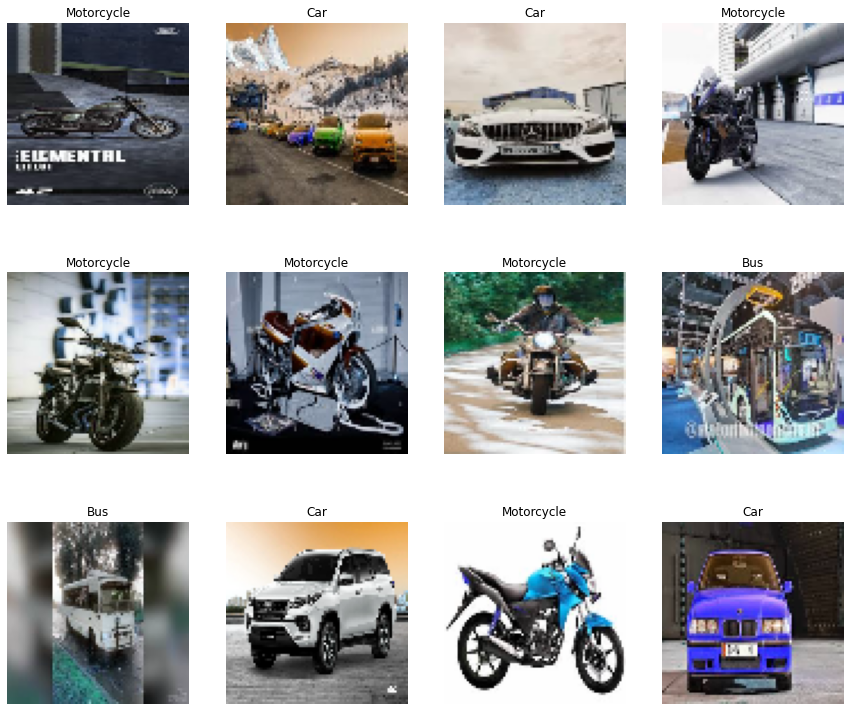

In [37]:
plt.figure(figsize=(15,13))
for i in range(0,12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

In [38]:
le=LabelEncoder()

In [39]:
labels=le.fit_transform(labels)

In [40]:
labels[:10]

array([2, 1, 1, 2, 2, 2, 2, 0, 0, 1], dtype=int64)

In [41]:
images=np.array(images)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=101,stratify=labels,shuffle=True)

In [43]:
X_train.shape

(15490, 80, 80, 3)

In [44]:
X_test.shape

(3873, 80, 80, 3)

In [45]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [46]:
X_train_scaled=X_train/255

In [47]:
X_test_scaled=X_test/255

In [48]:
X_train[1]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [49]:
X_train_scaled[1]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [50]:
len(y_train)

15490

In [51]:
len(y_test)

3873

In [52]:
model=classifier(classes=3)

In [53]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [54]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 80, 80, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 80, 80, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 40, 40, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool2 (MaxPooling2D)                 │ (None, 20, 20, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 20, 20, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool3 (MaxPooling2D)                 │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictor (Dense)                    │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 213,155 (832.64 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
early_stopping=EarlyStopping(monitor='val_loss',patience=2)

In [56]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 62s 72ms/step - accuracy: 0.5789 - loss: 0.8572 - val_accuracy: 0.8334 - val_loss: 0.4550
Epoch 2/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.8087 - loss: 0.4684 - val_accuracy: 0.8554 - val_loss: 0.3999
Epoch 3/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.8482 - loss: 0.3849 - val_accuracy: 0.8806 - val_loss: 0.3343
Epoch 4/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.8721 - loss: 0.3374 - val_accuracy: 0.8793 - val_loss: 0.3335
Epoch 5/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.8818 - loss: 0.3121 - val_accuracy: 0.8974 - val_loss: 0.2970
Epoch 6/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.8989 - loss: 0.2713 - val_accuracy: 0.8515 - val_loss: 0.4110
Epoch 7/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.9043 - loss: 0.2484 - val_accuracy: 0.8941 - val_loss: 0.3132


In [58]:
model.evaluate(X_test_scaled,y_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8856 - loss: 0.3111


[0.30153125524520874, 0.8915569186210632]

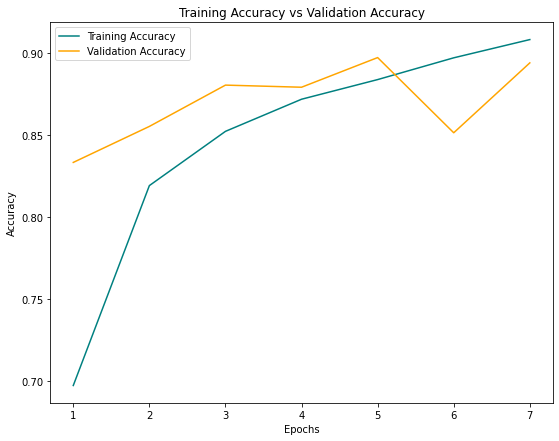

In [59]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],color='teal',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6],[1,2,3,4,5,6,7])
plt.legend()
plt.show()

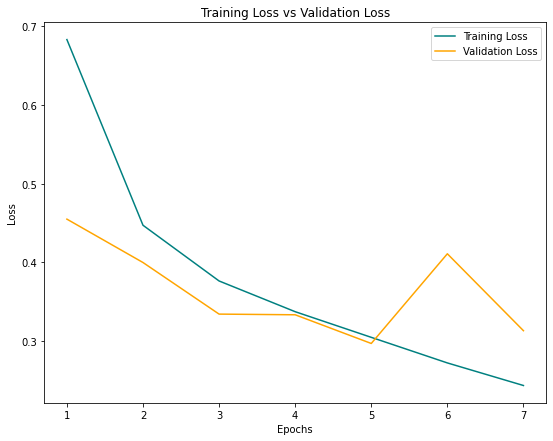

In [61]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],color='teal',label='Training Loss')
plt.plot(history.history['val_loss'],color='orange',label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks([0,1,2,3,4,5,6],[1,2,3,4,5,6,7])
plt.legend()
plt.show()

In [63]:
y_pred=model.predict(X_test_scaled)
y_pred[:10]

122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


array([[8.3781090e-03, 9.9120188e-01, 4.1998329e-04],
       [2.2907238e-02, 8.9567214e-01, 8.1420623e-02],
       [9.9816233e-01, 1.8219869e-03, 1.5685926e-05],
       [4.6076134e-02, 3.0124919e-02, 9.2379892e-01],
       [4.6381980e-02, 9.4096595e-01, 1.2652115e-02],
       [3.7486489e-09, 1.5529660e-06, 9.9999845e-01],
       [1.8560861e-01, 6.7448413e-01, 1.3990723e-01],
       [8.5564041e-01, 1.4392854e-01, 4.3106460e-04],
       [1.8374510e-02, 7.7744909e-02, 9.0388054e-01],
       [3.1104172e-03, 9.9675554e-01, 1.3397443e-04]], dtype=float32)

In [65]:
y_predict=[np.argmax(i) for i in y_pred]
y_predict[:10]

[1, 1, 0, 2, 1, 2, 1, 0, 2, 1]

In [66]:
y_test[:10]

array([1, 0, 0, 2, 1, 2, 2, 1, 2, 1], dtype=int64)

In [67]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1317
           1       0.83      0.91      0.87      1175
           2       0.94      0.88      0.91      1381

    accuracy                           0.89      3873
   macro avg       0.89      0.89      0.89      3873
weighted avg       0.89      0.89      0.89      3873



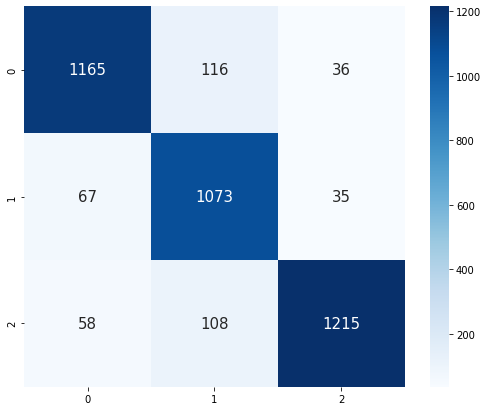

In [69]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.show()

In [75]:
def input_image(path):
    image=Image.open(path)
    img=image
    image=image.resize((80,80))
    image=np.reshape(image,[1,80,80,3])
    predict=le.inverse_transform([np.argmax(model.predict(image))])[0]
    print('The',predict,'was seen in the image')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The Bus was seen in the image


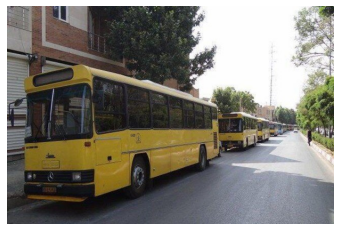

In [83]:
input_image('img/3.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The Motorcycle was seen in the image


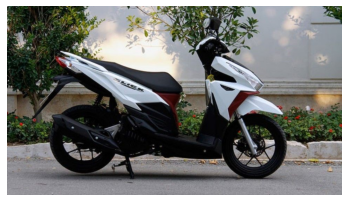

In [87]:
input_image('img/2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The Car was seen in the image


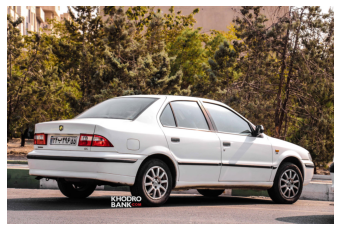

In [89]:
input_image('img/1.jpg')